Objective: Predict the price

In [38]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
target_df= df["price"]

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [40]:
# Obtain dimensions
df.shape

(48895, 16)

In [41]:
# Obtain information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [42]:
duplicate_rows = df[df['id'].duplicated(keep='last')]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [43]:
df.drop("id", axis = 1).duplicated().sum()

np.int64(0)

In [44]:
# Validating if there are any duplicates
df = df.drop_duplicates(subset = df.columns.difference(['id']))
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [45]:
if df.duplicated().sum():
    df = df.drop_duplicates()
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
df.drop(["name", "host_name", "last_review"], axis = 1, inplace = True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


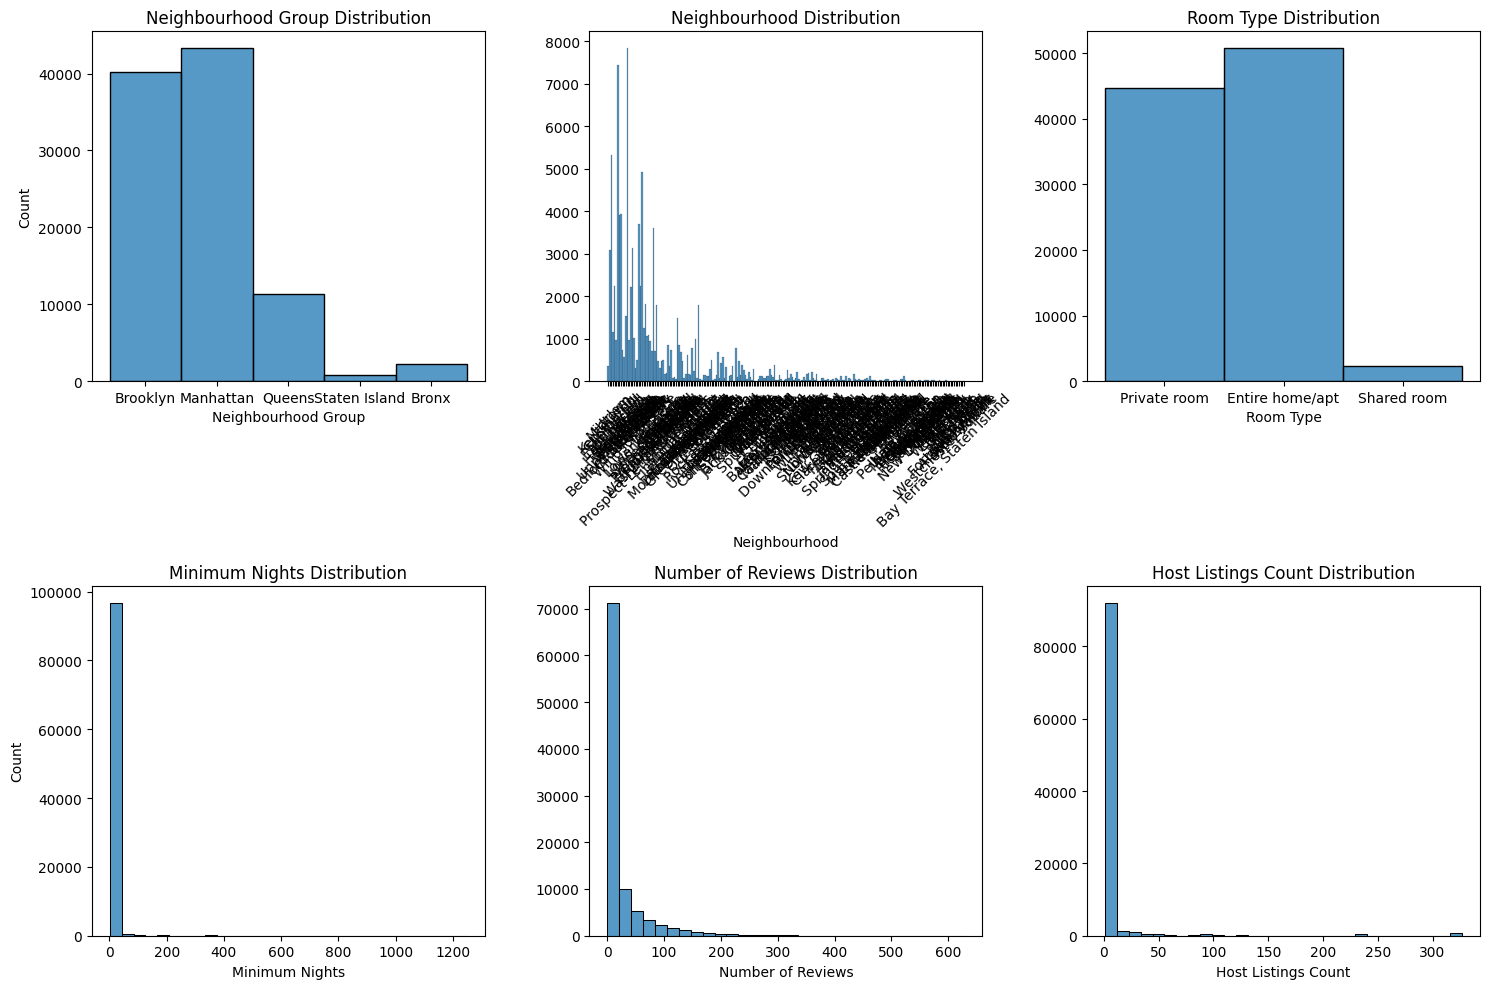

In [49]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))  # Increase figure size for better readability

# Neighbourhood Group histogram with categorical data adjusted
sns.histplot(ax=axis[0, 0], data=df, x="neighbourhood_group", discrete=True)
axis[0, 0].set_title("Neighbourhood Group Distribution")
axis[0, 0].set_xlabel("Neighbourhood Group")
axis[0, 0].set_ylabel("Count")

# Neighbourhood histogram with rotation of x-axis labels
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood", discrete=True)
axis[0, 1].set_title("Neighbourhood Distribution")
axis[0, 1].set_xlabel("Neighbourhood")
axis[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
axis[0, 1].set_ylabel(None)  # Remove y-label to reduce clutter

# Room Type histogram with adjusted bar width for categorical data
sns.histplot(ax=axis[0, 2], data=df, x="room_type", discrete=True)
axis[0, 2].set_title("Room Type Distribution")
axis[0, 2].set_xlabel("Room Type")
axis[0, 2].set_ylabel(None)  # Remove y-label to reduce clutter

# Minimum Nights histogram with optimized bin size
sns.histplot(ax=axis[1, 0], data=df, x="minimum_nights", bins=30)
axis[1, 0].set_title("Minimum Nights Distribution")
axis[1, 0].set_xlabel("Minimum Nights")
axis[1, 0].set_ylabel("Count")

# Number of Reviews histogram with optimized bin size
sns.histplot(ax=axis[1, 1], data=df, x="number_of_reviews", bins=30)
axis[1, 1].set_title("Number of Reviews Distribution")
axis[1, 1].set_xlabel("Number of Reviews")
axis[1, 1].set_ylabel(None)  # Remove y-label to reduce clutter

# Calculated Host Listings Count histogram with optimized bin size
sns.histplot(ax=axis[1, 2], data=df, x="calculated_host_listings_count", bins=30)
axis[1, 2].set_title("Host Listings Count Distribution")
axis[1, 2].set_xlabel("Host Listings Count")
axis[1, 2].set_ylabel(None)  # Remove y-label to reduce clutter

# Adjust the layout to reduce overlap and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

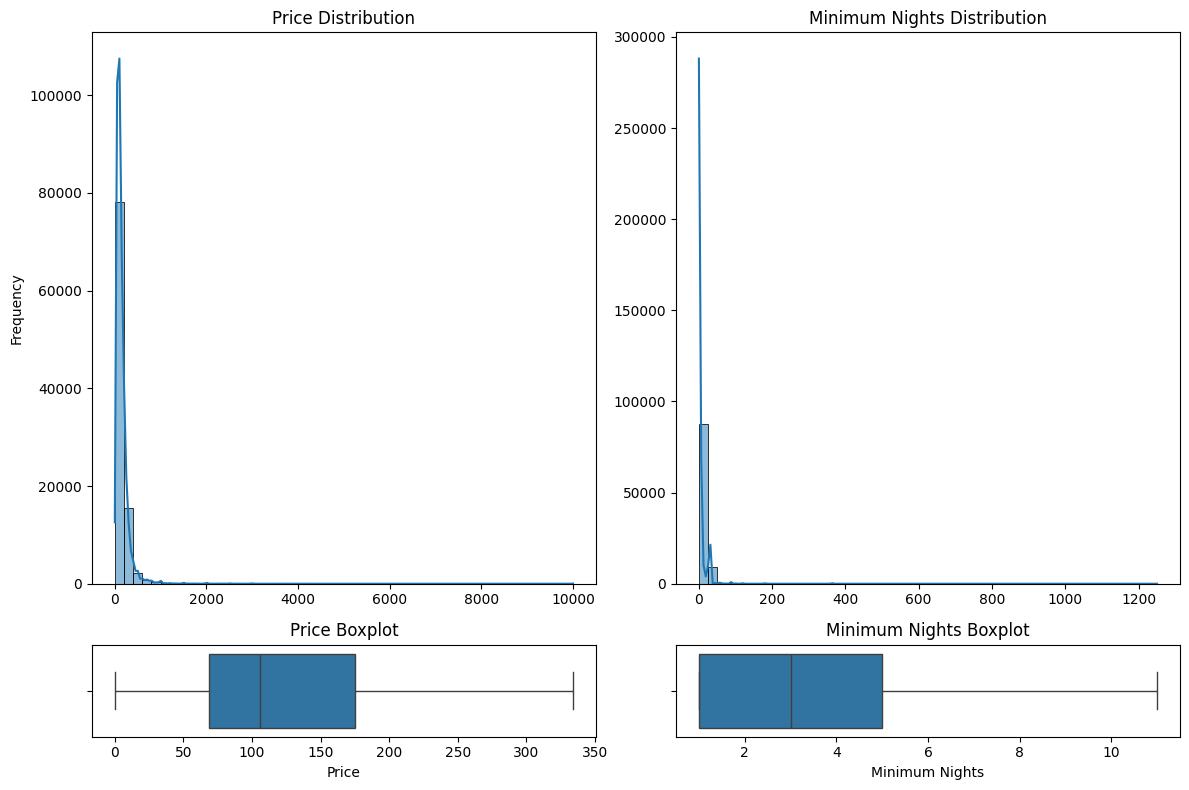

In [50]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [6, 1]})  # Slightly increase figure size

# Price histogram with better bin size and title
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=50, kde=True)
axis[0, 0].set_title("Price Distribution")
axis[0, 0].set_xlabel(None)  # Remove x-label to avoid duplication with the boxplot
axis[0, 0].set_ylabel("Frequency")

# Price boxplot with title and outlier adjustment
sns.boxplot(ax=axis[1, 0], data=df, x="price", showfliers=False)
axis[1, 0].set_title("Price Boxplot")
axis[1, 0].set_xlabel("Price")
axis[1, 0].set_ylabel(None)  # Remove y-label for consistency

# Duplicated histogram for a different variable, e.g., `minimum_nights`
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=50, kde=True)
axis[0, 1].set_title("Minimum Nights Distribution")
axis[0, 1].set_xlabel(None)  # Remove x-label to avoid duplication with the boxplot
axis[0, 1].set_ylabel(None)  # Remove y-label for symmetry

# Minimum nights boxplot with title and outlier adjustment
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights", showfliers=False)
axis[1, 1].set_title("Minimum Nights Boxplot")
axis[1, 1].set_xlabel("Minimum Nights")
axis[1, 1].set_ylabel(None)  # Remove y-label for consistency

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

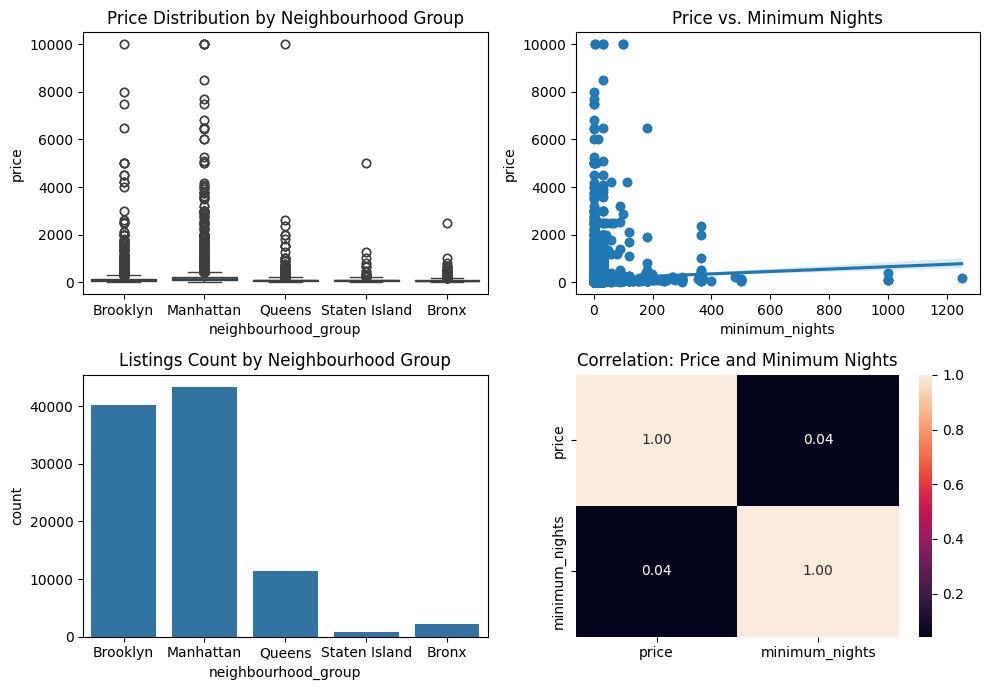

In [51]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a boxplot instead of regplot for the categorical variable
sns.boxplot(ax=axis[0, 0], data=df, x="neighbourhood_group", y="price")
axis[0, 0].set_title("Price Distribution by Neighbourhood Group")

# Create a bar plot to show the count of listings in each neighbourhood group
sns.countplot(ax=axis[1, 0], data=df, x="neighbourhood_group")
axis[1, 0].set_title("Listings Count by Neighbourhood Group")

# Continue with regplot for continuous variable
sns.regplot(ax=axis[0, 1], data=df, x="minimum_nights", y="price")
axis[0, 1].set_title("Price vs. Minimum Nights")

# Correlation heatmap for continuous variables
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_title("Correlation: Price and Minimum Nights")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

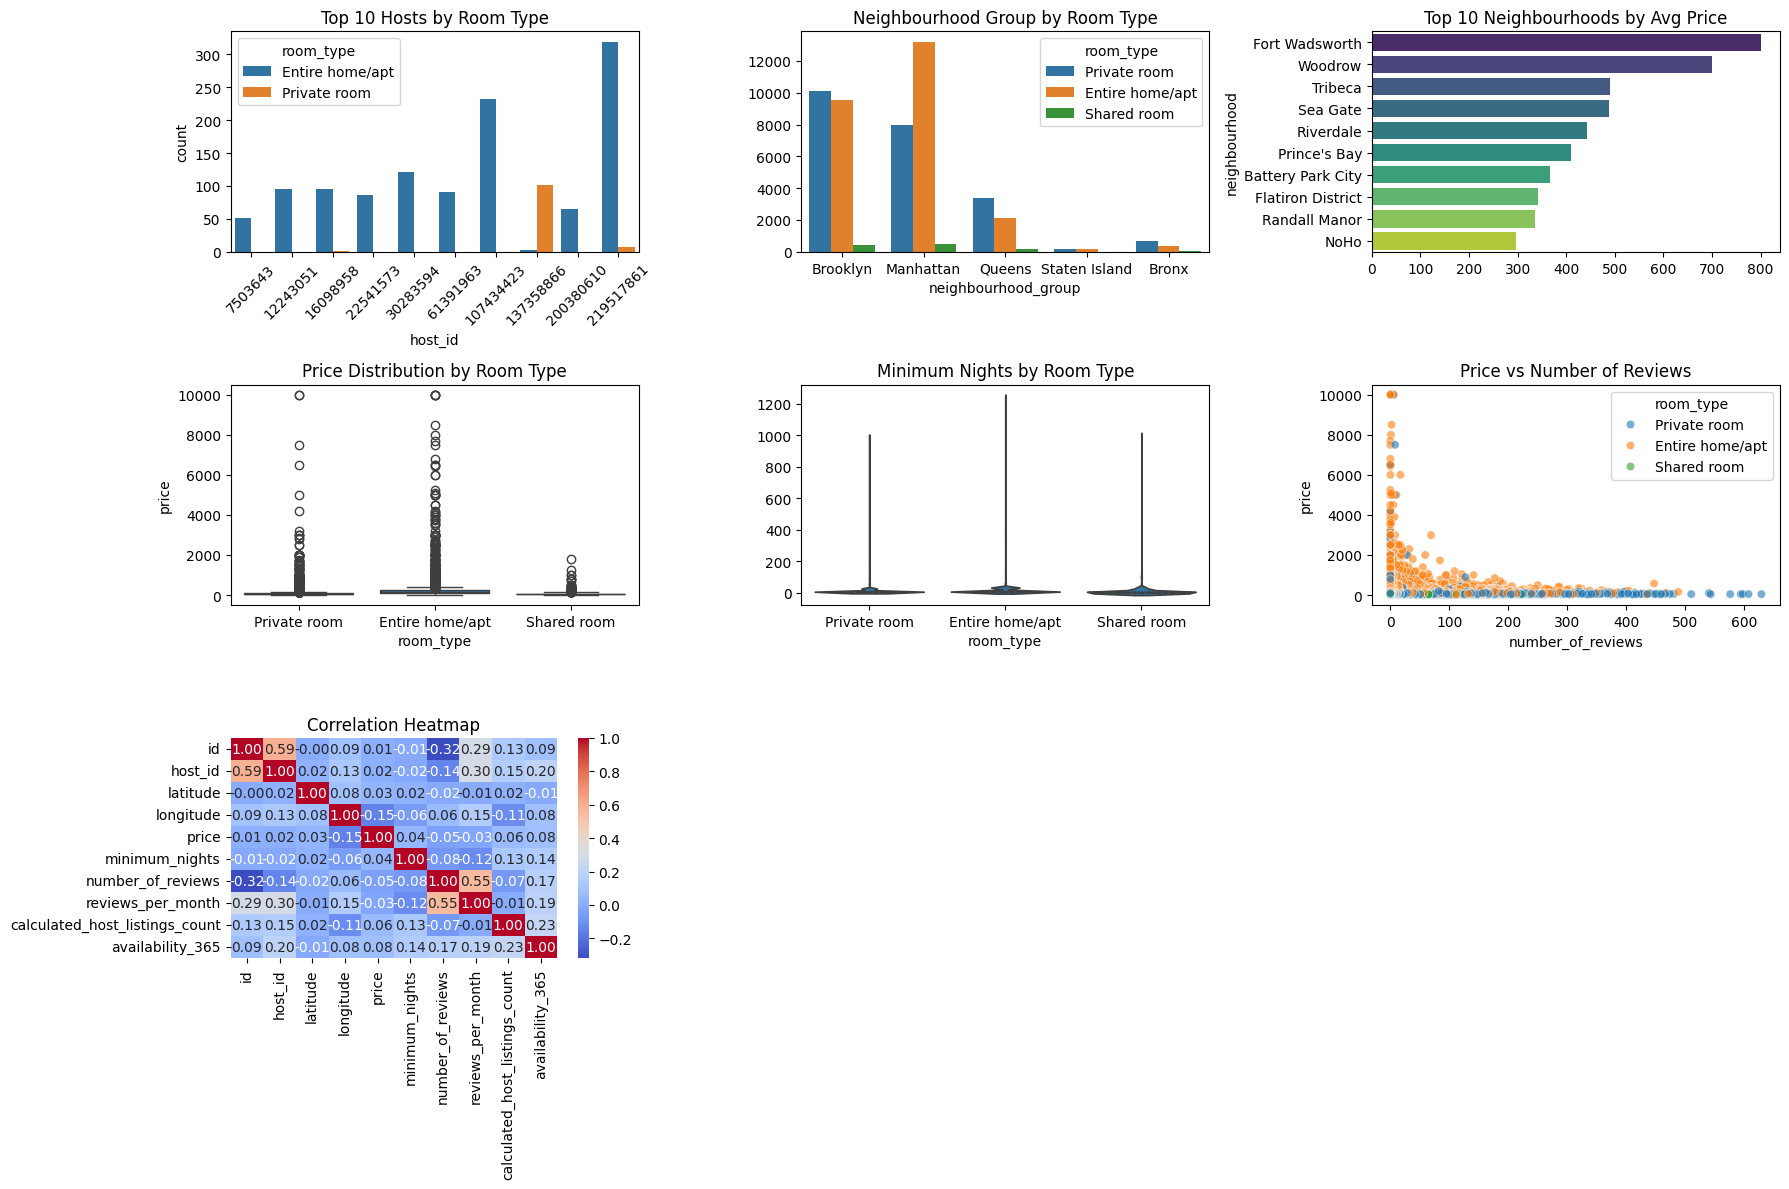

In [54]:
fig, axis = plt.subplots(3, 3, figsize=(18, 12))

# Count plot for host_id with limited categories (e.g., top 10)
top_hosts = df['host_id'].value_counts().nlargest(10).index
sns.countplot(ax=axis[0, 0], data=df[df['host_id'].isin(top_hosts)], x="host_id", hue="room_type")
axis[0, 0].set_title("Top 10 Hosts by Room Type")
axis[0, 0].tick_params(axis='x', rotation=45)

# Count plot for neighbourhood_group
sns.countplot(ax=axis[0, 1], data=df, x="neighbourhood_group", hue="room_type")
axis[0, 1].set_title("Neighbourhood Group by Room Type")
axis[0, 1].set_ylabel(None)

# Bar plot for average price per neighbourhood (hue assignment)
sns.barplot(ax=axis[0, 2], x=avg_price_neighbourhood.values, y=avg_price_neighbourhood.index, hue=avg_price_neighbourhood.index, palette="viridis", legend=False)
axis[0, 2].set_title("Top 10 Neighbourhoods by Avg Price")

# Box plot for room_type and price
sns.boxplot(ax=axis[1, 0], data=df, x="room_type", y="price")
axis[1, 0].set_title("Price Distribution by Room Type")

# Violin plot for minimum_nights and room_type (updated parameter)
sns.violinplot(ax=axis[1, 1], data=df, x="room_type", y="minimum_nights", density_norm='width', inner='quartile')
axis[1, 1].set_title("Minimum Nights by Room Type")
axis[1, 1].set_ylabel(None)

# Scatter plot to visualize relationship between price and number of reviews
sns.scatterplot(ax=axis[1, 2], data=df, x="number_of_reviews", y="price", hue="room_type", alpha=0.6)
axis[1, 2].set_title("Price vs Number of Reviews")

# Heatmap for correlation among numerical variables
numeric_df = df.select_dtypes(include='number')  # Selecting only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axis[2, 0])
axis[2, 0].set_title("Correlation Heatmap")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

In [55]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


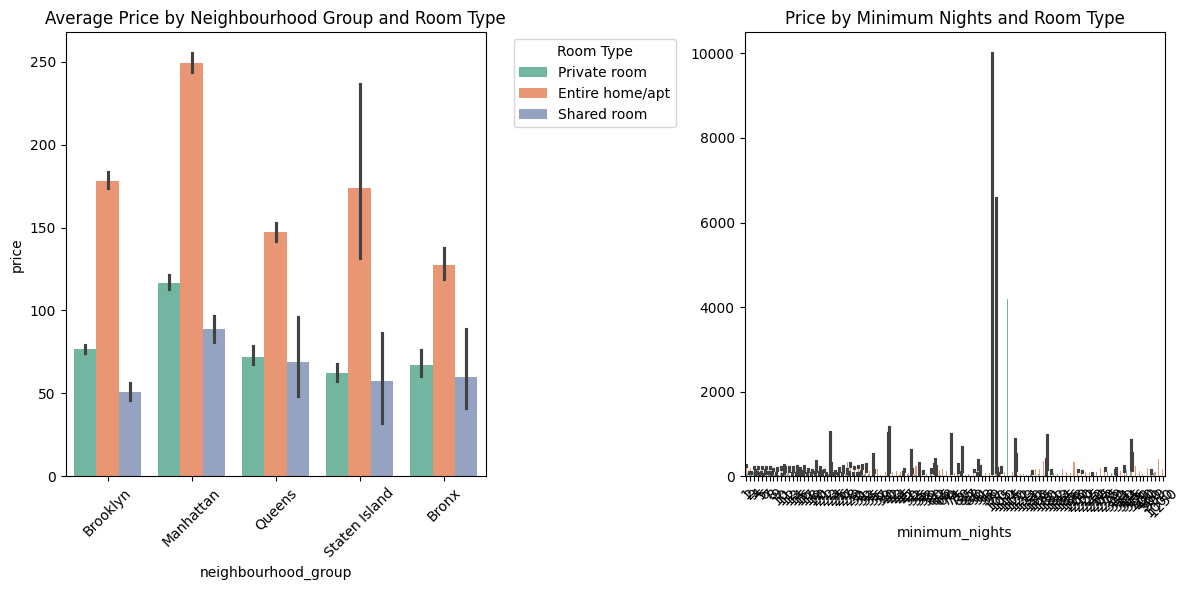

In [61]:
fig, axis = plt.subplots(figsize=(12, 6), ncols=2)

# Bar plot for Neighbourhood Group vs Price with Room Type as hue
sns.barplot(ax=axis[0], data=df, x="neighbourhood_group", y="price", hue="room_type", palette="Set2")
axis[0].set_title("Average Price by Neighbourhood Group and Room Type")
axis[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axis[0].legend(title="Room Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Bar plot for Minimum Nights vs Price with Room Type as hue
sns.barplot(ax=axis[1], data=df, x="minimum_nights", y="price", hue="room_type", palette="Set2", legend=False)
axis[1].set_title("Price by Minimum Nights and Room Type")
axis[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axis[1].set_ylabel(None)  # Remove redundant y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

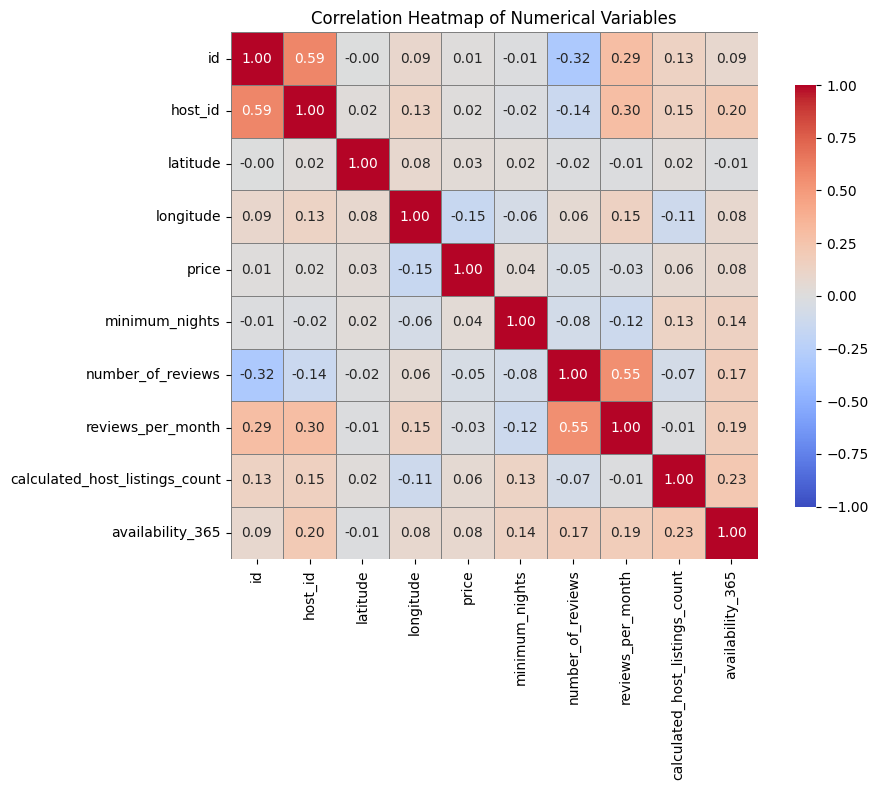

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(
    numeric_df.corr(),
    annot=True,            # Display correlation coefficients
    fmt=".2f",            # Format for annotation text
    cmap='coolwarm',      # Color map for the heatmap
    ax=ax,                # Specify the axis for the plot
    vmin=-1, vmax=1,      # Set the color scale to range from -1 to 1
    center=0,             # Center the color map at 0
    square=True,          # Make the heatmap square
    linewidths=0.5,      # Add lines between cells
    linecolor='gray',    # Line color between cells
    cbar_kws={'shrink': .8}  # Color bar settings
)
ax.set_title("Correlation Heatmap of Numerical Variables")

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

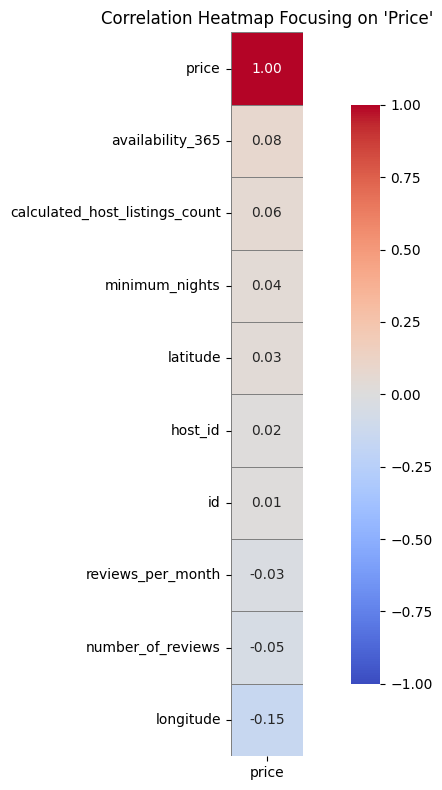

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns and include 'price'
numeric_df = df.select_dtypes(include='number')

# Ensure 'price' is included
if 'price' not in numeric_df.columns:
    raise ValueError("The 'price' column is not in the numeric data")

# Calculate the correlation matrix for 'price' and other numeric variables
corr_matrix = numeric_df.corr()
price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)

# Plot the heatmap
sns.heatmap(
    price_corr,            # Use correlation matrix for 'price'
    annot=True,            # Display correlation coefficients
    fmt=".2f",            # Format for annotation text
    cmap='coolwarm',      # Color map for the heatmap
    ax=ax,                # Specify the axis for the plot
    vmin=-1, vmax=1,      # Set the color scale to range from -1 to 1
    center=0,             # Center the color map at 0
    square=True,          # Make the heatmap square
    linewidths=0.5,      # Add lines between cells
    linecolor='gray',    # Line color between cells
    cbar_kws={'shrink': .8}  # Color bar settings
)
ax.set_title("Correlation Heatmap Focusing on 'Price'")

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

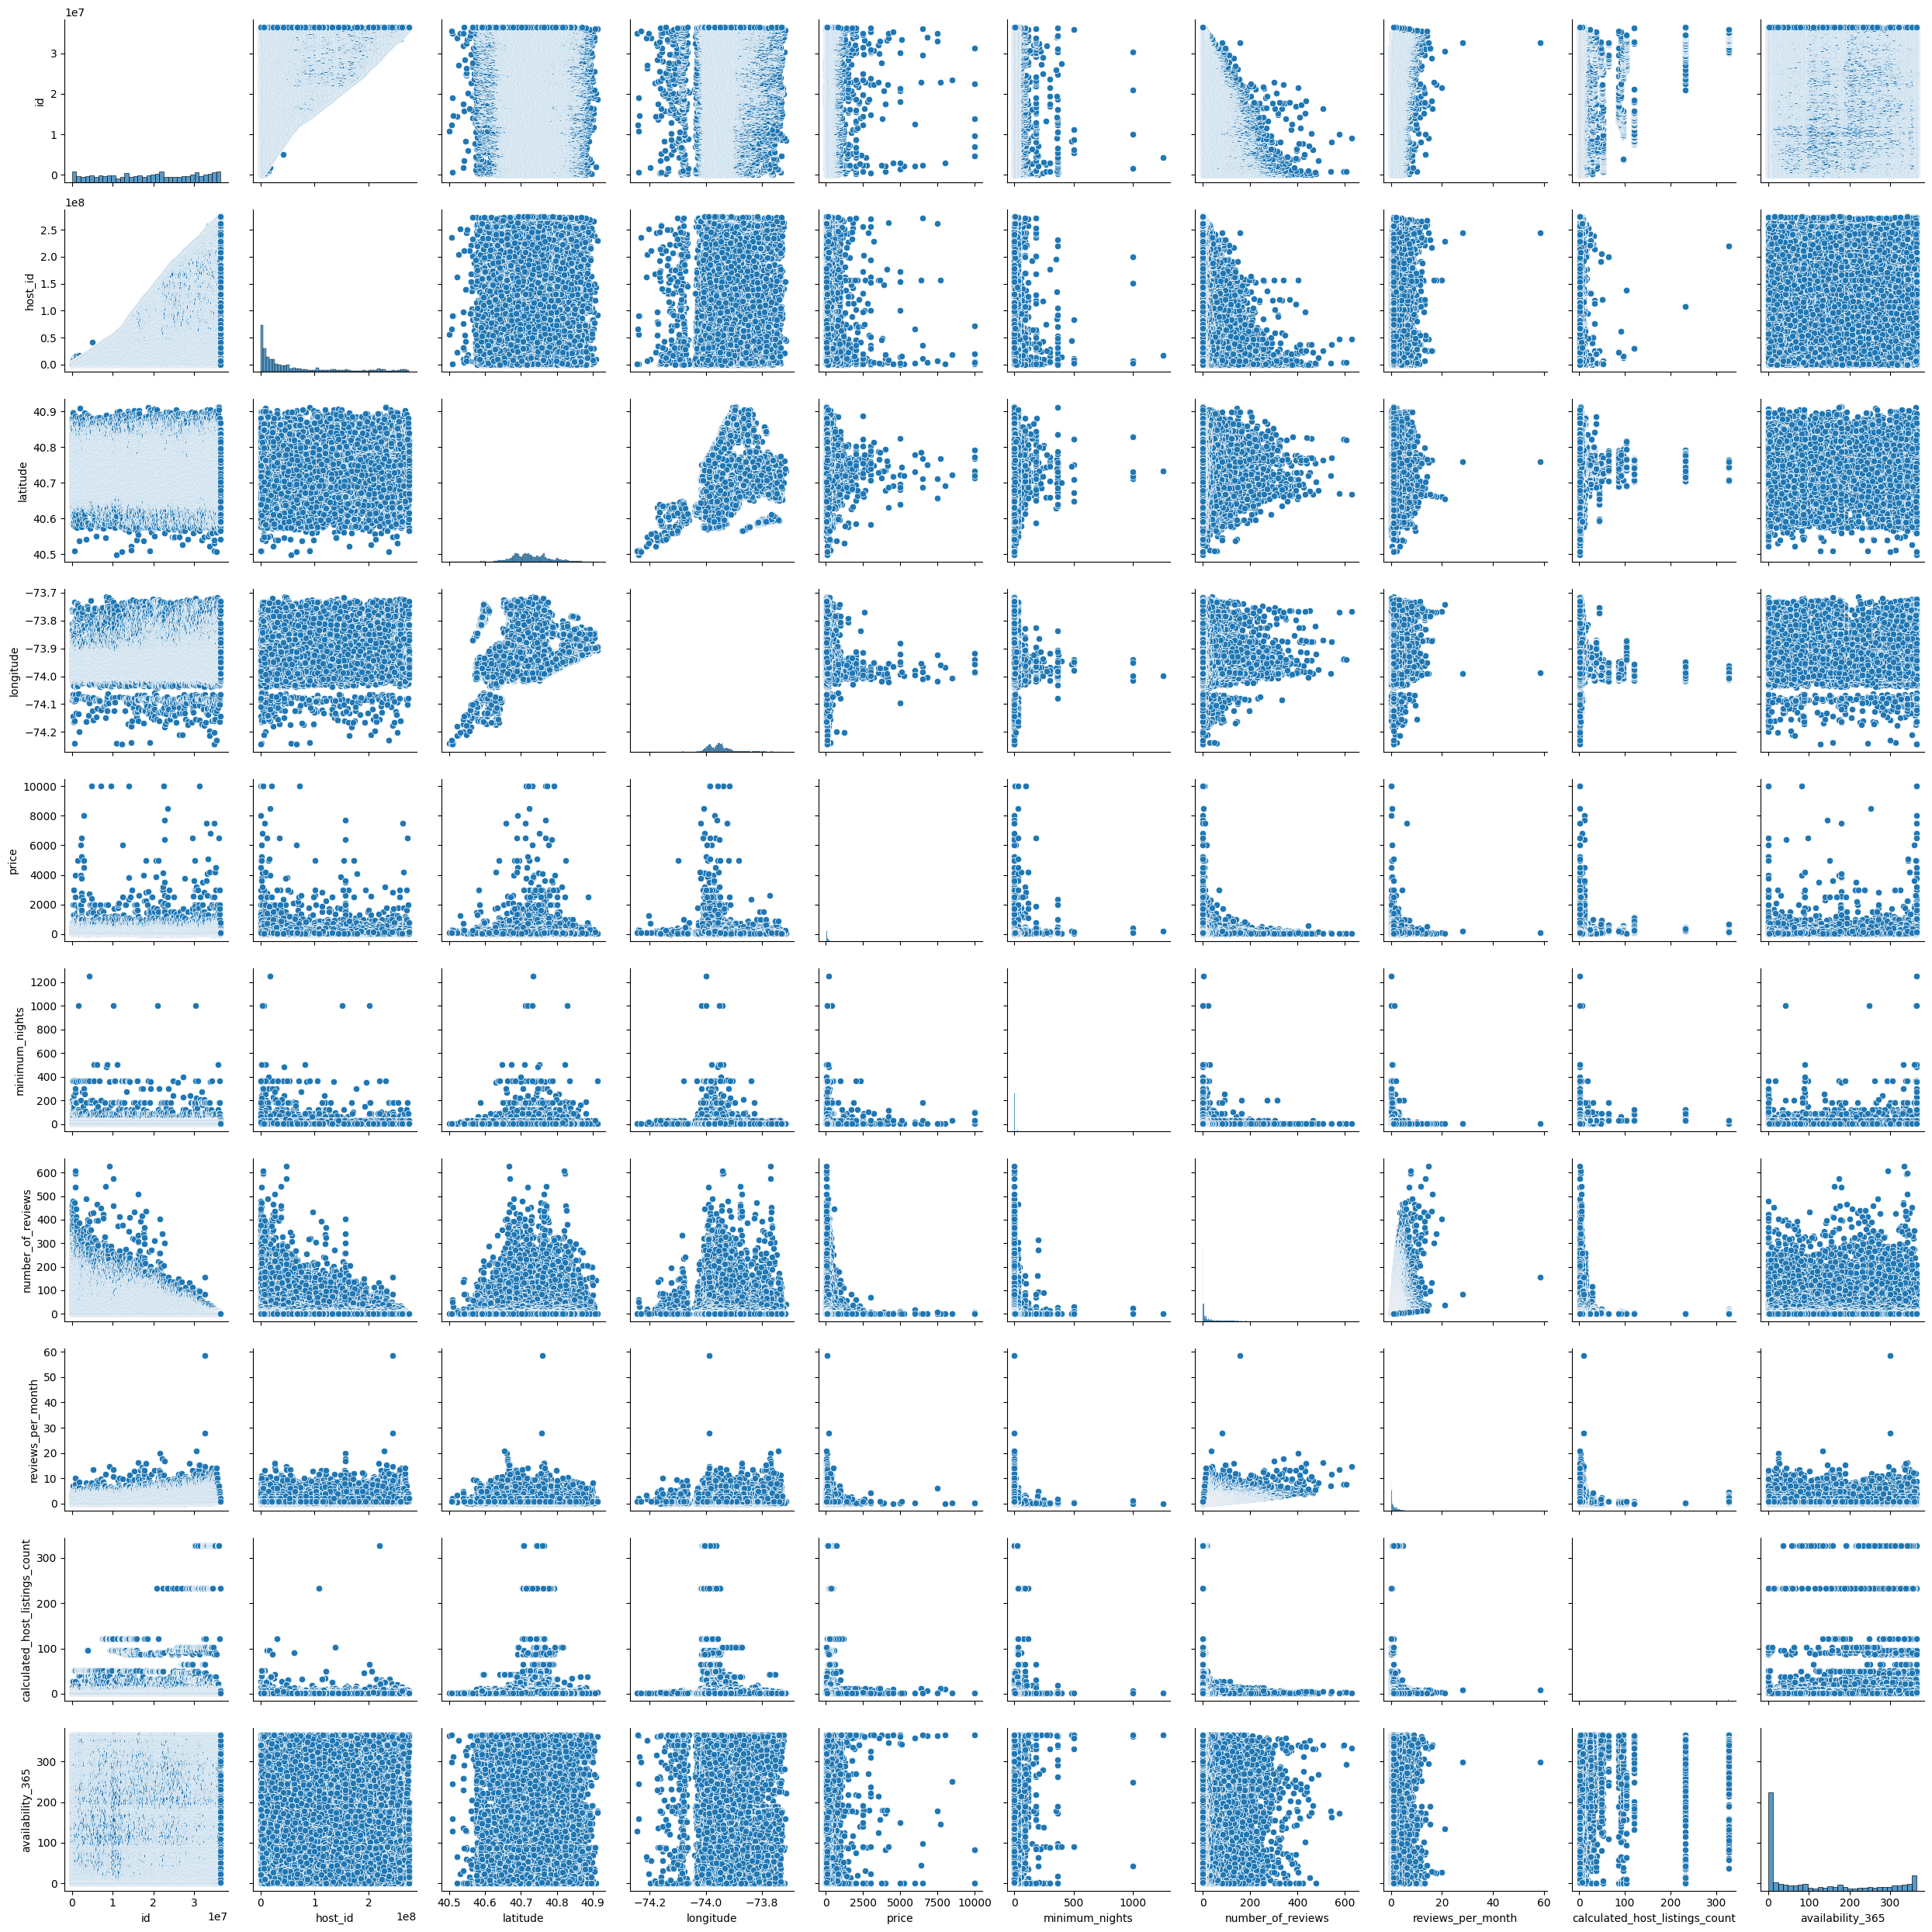

In [69]:
sns.pairplot(data = df)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()